# hw4 - NN pyTorch

Во всем задании вы должны работать со входом из строк размером (длиной) 1024

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import pandas as pd
import torch.nn

from torchvision import transforms
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.signal import periodogram
from keras import models, layers                       # for NN
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error as mse
from tqdm import tqdm
from torch.utils.data import DataLoader, Dataset, Subset
import scipy

print(torch.__version__)

1.13.0+cpu


## Часть 1 Фурье

### Подготовка данных

Сгенерите данные (сигнал) любым пакетом для численного преобразования Фурье, [например](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html#numpy.fft.fft)

In [19]:
N_A_ph = 50
N_freq = 1024

In [20]:
def fft_data(N_A_ph, N_freq):
    freq = np.linspace(0, 2*np.pi, N_freq)
    phase = np.linspace(0, 2*np.pi, N_A_ph)
    A = np.linspace(0.1, 2, N_A_ph)
    cos = np.array([[a*np.cos(freq+ph)] for a in A for ph in phase])
    
    x = torch.FloatTensor(cos[:, 0])
    y = torch.fft.fft(x)
    
    # NN can't work with complex, so we get absolute of real and imag
    y1 = y.real
    y2 = y.imag 
    y = torch.concat((y1, y2), dim = 1)
    return(x, y)

In [21]:
X_fft, y_fft = fft_data(N_A_ph, N_freq)

In [22]:
X_train_fft, X_test_fft, y_train_fft, y_test_fft = train_test_split(X_fft, y_fft, train_size=0.8, test_size=0.2,
                                                    shuffle=True, random_state=42)

In [23]:
X_train_fft_detach.shape[1]

1024

### Соберите и обучите нейросетку на pyTroch для преобразования Фурье

In [26]:
# FFT is linear, so we use only linear functions
X_train_fft_detach = X_train_fft.detach().numpy()
y_train_fft_detach = y_train_fft.detach().numpy()

model_fft = models.Sequential()
model_fft.add(layers.Dense(2048, activation='linear', input_shape =(X_train_fft_detach.shape[1],))) # keras don't work with tensor
#model_fft.add(layers.Dense(3000, activation='linear'))
#model_fft.add(layers.Dense(2048, activation='linear')) # in out we need 2048 objects
model_fft.summary()

model_fft.compile(optimizer='adam', loss='mse', metrics=['mse'])

model_fft.fit(X_train_fft_detach, y_train_fft_detach, epochs=500, batch_size=200)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 2048)              2099200   
                                                                 
Total params: 2,099,200
Trainable params: 2,099,200
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
10/10 [==============================] - 1s 31ms/step - loss: 355.9922 - mse: 355.9922
Epoch 2/500
10/10 [==============================] - 0s 32ms/step - loss: 346.9462 - mse: 346.9462
Epoch 3/500
10/10 [==============================] - 0s 32ms/step - loss: 338.0628 - mse: 338.0628
Epoch 4/500
10/10 [==============================] - 0s 32ms/step - loss: 329.3831 - mse: 329.3831
Epoch 5/500
10/10 [==============================] - 0s 32ms/step - loss: 320.8297 - mse: 320.8297
Epoch 6/500
10/10 [==============================] - 0s 32ms/step - loss: 312

10/10 [==============================] - 0s 31ms/step - loss: 27.2484 - mse: 27.2484
Epoch 78/500
10/10 [==============================] - 0s 32ms/step - loss: 26.0818 - mse: 26.0818
Epoch 79/500
10/10 [==============================] - 0s 31ms/step - loss: 24.9528 - mse: 24.9528
Epoch 80/500
10/10 [==============================] - 0s 31ms/step - loss: 23.8408 - mse: 23.8408
Epoch 81/500
10/10 [==============================] - 0s 31ms/step - loss: 22.7895 - mse: 22.7895
Epoch 82/500
10/10 [==============================] - 0s 32ms/step - loss: 21.7752 - mse: 21.7752
Epoch 83/500
10/10 [==============================] - 0s 31ms/step - loss: 20.8013 - mse: 20.8013
Epoch 84/500
10/10 [==============================] - 0s 33ms/step - loss: 19.8585 - mse: 19.8585
Epoch 85/500
10/10 [==============================] - 0s 32ms/step - loss: 18.9632 - mse: 18.9632
Epoch 86/500
10/10 [==============================] - 0s 31ms/step - loss: 18.0833 - mse: 18.0833
Epoch 87/500
10/10 [=============

10/10 [==============================] - 0s 32ms/step - loss: 0.1693 - mse: 0.1693
Epoch 162/500
10/10 [==============================] - 0s 31ms/step - loss: 0.1562 - mse: 0.1562
Epoch 163/500
10/10 [==============================] - 0s 33ms/step - loss: 0.1443 - mse: 0.1443
Epoch 164/500
10/10 [==============================] - 0s 34ms/step - loss: 0.1331 - mse: 0.1331
Epoch 165/500
10/10 [==============================] - 0s 32ms/step - loss: 0.1227 - mse: 0.1227
Epoch 166/500
10/10 [==============================] - 0s 31ms/step - loss: 0.1130 - mse: 0.1130
Epoch 167/500
10/10 [==============================] - 0s 31ms/step - loss: 0.1043 - mse: 0.1043
Epoch 168/500
10/10 [==============================] - 0s 31ms/step - loss: 0.0962 - mse: 0.0962
Epoch 169/500
10/10 [==============================] - 0s 32ms/step - loss: 0.0886 - mse: 0.0886
Epoch 170/500
10/10 [==============================] - 0s 32ms/step - loss: 0.0813 - mse: 0.0813
Epoch 171/500
10/10 [=======================

Epoch 243/500
10/10 [==============================] - 0s 32ms/step - loss: 3.9224e-04 - mse: 3.9224e-04
Epoch 244/500
10/10 [==============================] - 0s 30ms/step - loss: 3.9980e-04 - mse: 3.9980e-04
Epoch 245/500
10/10 [==============================] - 0s 31ms/step - loss: 3.8864e-04 - mse: 3.8864e-04
Epoch 246/500
10/10 [==============================] - 0s 30ms/step - loss: 3.8006e-04 - mse: 3.8006e-04
Epoch 247/500
10/10 [==============================] - 0s 31ms/step - loss: 5.5573e-04 - mse: 5.5573e-04
Epoch 248/500
10/10 [==============================] - 0s 31ms/step - loss: 6.5017e-04 - mse: 6.5017e-04
Epoch 249/500
10/10 [==============================] - 0s 31ms/step - loss: 5.9205e-04 - mse: 5.9205e-04
Epoch 250/500
10/10 [==============================] - 0s 30ms/step - loss: 5.6888e-04 - mse: 5.6888e-04
Epoch 251/500
10/10 [==============================] - 0s 31ms/step - loss: 4.7488e-04 - mse: 4.7488e-04
Epoch 252/500
10/10 [==============================] - 

10/10 [==============================] - 0s 31ms/step - loss: 3.5787e-04 - mse: 3.5787e-04
Epoch 320/500
10/10 [==============================] - 0s 30ms/step - loss: 3.5299e-04 - mse: 3.5299e-04
Epoch 321/500
10/10 [==============================] - 0s 30ms/step - loss: 4.3156e-04 - mse: 4.3155e-04
Epoch 322/500
10/10 [==============================] - 0s 30ms/step - loss: 5.4661e-04 - mse: 5.4661e-04
Epoch 323/500
10/10 [==============================] - 0s 31ms/step - loss: 4.9391e-04 - mse: 4.9391e-04
Epoch 324/500
10/10 [==============================] - 0s 32ms/step - loss: 4.2373e-04 - mse: 4.2373e-04
Epoch 325/500
10/10 [==============================] - 0s 31ms/step - loss: 3.8648e-04 - mse: 3.8648e-04
Epoch 326/500
10/10 [==============================] - 0s 31ms/step - loss: 5.6918e-04 - mse: 5.6918e-04
Epoch 327/500
10/10 [==============================] - 0s 31ms/step - loss: 5.4862e-04 - mse: 5.4862e-04
Epoch 328/500
10/10 [==============================] - 0s 30ms/step -

10/10 [==============================] - 0s 31ms/step - loss: 3.4642e-04 - mse: 3.4642e-04
Epoch 398/500
10/10 [==============================] - 0s 32ms/step - loss: 5.9028e-04 - mse: 5.9028e-04
Epoch 399/500
10/10 [==============================] - 0s 34ms/step - loss: 6.6844e-04 - mse: 6.6844e-04
Epoch 400/500
10/10 [==============================] - 0s 33ms/step - loss: 4.3251e-04 - mse: 4.3251e-04
Epoch 401/500
10/10 [==============================] - 0s 31ms/step - loss: 5.0582e-04 - mse: 5.0582e-04
Epoch 402/500
10/10 [==============================] - 0s 31ms/step - loss: 5.8458e-04 - mse: 5.8458e-04
Epoch 403/500
10/10 [==============================] - 0s 32ms/step - loss: 5.3047e-04 - mse: 5.3047e-04
Epoch 404/500
10/10 [==============================] - 0s 30ms/step - loss: 3.7475e-04 - mse: 3.7475e-04
Epoch 405/500
10/10 [==============================] - 0s 31ms/step - loss: 4.6536e-04 - mse: 4.6536e-04
Epoch 406/500
10/10 [==============================] - 0s 30ms/step -

10/10 [==============================] - 0s 31ms/step - loss: 1.9361e-04 - mse: 1.9361e-04
Epoch 476/500
10/10 [==============================] - 0s 30ms/step - loss: 2.5120e-04 - mse: 2.5120e-04
Epoch 477/500
10/10 [==============================] - 0s 30ms/step - loss: 2.3570e-04 - mse: 2.3570e-04
Epoch 478/500
10/10 [==============================] - 0s 32ms/step - loss: 2.6891e-04 - mse: 2.6891e-04
Epoch 479/500
10/10 [==============================] - 0s 32ms/step - loss: 1.7140e-04 - mse: 1.7140e-04
Epoch 480/500
10/10 [==============================] - 0s 34ms/step - loss: 1.2145e-04 - mse: 1.2145e-04
Epoch 481/500
10/10 [==============================] - 0s 34ms/step - loss: 1.4105e-04 - mse: 1.4105e-04
Epoch 482/500
10/10 [==============================] - 0s 35ms/step - loss: 2.9920e-04 - mse: 2.9920e-04
Epoch 483/500
10/10 [==============================] - 0s 32ms/step - loss: 3.2424e-04 - mse: 3.2424e-04
Epoch 484/500
10/10 [==============================] - 0s 32ms/step -

In [27]:
X_test_fft_detach = X_test_fft.detach().numpy()
y_test_fft_detach = y_test_fft.detach().numpy()

y_pred_fft = model_fft.predict(X_test_fft_detach)

### Сравните свое решение с пакетным методом

In [28]:
mse(y_pred_fft, y_test_fft_detach)

0.0004778415

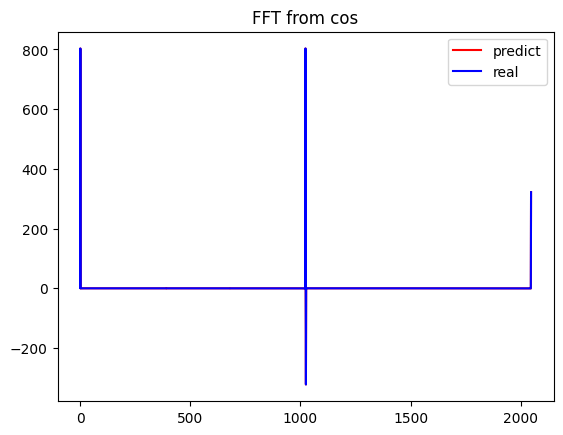

In [9]:
plt.plot(y_pred_fft[100], color = "red", label = "predict")
plt.plot(y_test_fft_detach[100], color = "blue", label = "real")
plt.title("FFT from cos")
plt.legend()
plt.show()

## Часть 2 Power spectral density (dB)

### Подготовка данных

Используя пакетное решение, [например](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.periodogram.html), подготовьте обучающую выборку.

In [10]:
def psd_data(T, freq, N):  
    time = np.arange(0, T, 1/freq)[:1024] 
    freq1 = np.random.random(N)
    freq2 = np.random.random(N)
    input_sig = [list(np.random.random() * np.cos(2 * freq1[i] * np.pi * time) + np.random.random()* np.cos(2 * freq2[i] * np.pi * time)) for i in range(len(freq1))]
    
    x = torch.FloatTensor(input_sig)
    
    _, power = scipy.signal.periodogram(x, freq)
    y = torch.FloatTensor(power)  
    return x, y

In [11]:
N_freq = 50
freq = 100.0 
T = 60 

X_psd_data, y_psd_data = psd_data(T, freq, N_freq)

In [12]:
X_train_psd, X_test_psd, y_train_psd, y_test_psd = train_test_split(X_psd_data, y_psd_data, train_size=0.8, test_size=0.2,
                                                    shuffle=True, random_state=42)

### Соберите и обучите нейросеть для предсказания спектральной плотности мощности

*Подсказка: для входа 1024 выход будет 512*

In [13]:
X_train_psd_detach = X_train_psd.detach().numpy()
y_train_psd_detach = y_train_psd.detach().numpy()

model_psd = models.Sequential()
model_psd.add(layers.Dense(1000, activation='linear', input_shape =(X_train_psd_detach.shape[1],)))
model_psd.add(layers.Dense(3000, activation='linear'))
model_psd.add(layers.Dense(513, activation='linear'))
model_psd.summary()

model_psd.compile(optimizer='adam', loss='mse', metrics=['mse'])

model_psd.fit(X_train_psd_detach, y_train_psd_detach, epochs=100, batch_size=200)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1000)              1025000   
                                                                 
 dense_4 (Dense)             (None, 3000)              3003000   
                                                                 
 dense_5 (Dense)             (None, 513)               1539513   
                                                                 
Total params: 5,567,513
Trainable params: 5,567,513
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1/1 [==============================] - 1s 549ms/step - loss: 0.2810 - mse: 0.2810
Epoch 2/100
1/1 [==============================] - 0s 72ms/step - loss: 0.2142 - mse: 0.2142
Epoch 3/100
1/1 [==============================] - 0s 49ms/step - loss: 0.0947 - mse: 0.0947
Epoch 4/100
1/1 [===========

1/1 [==============================] - 0s 56ms/step - loss: 3.4310e-04 - mse: 3.4310e-04
Epoch 77/100
1/1 [==============================] - 0s 56ms/step - loss: 3.4172e-04 - mse: 3.4172e-04
Epoch 78/100
1/1 [==============================] - 0s 56ms/step - loss: 3.4009e-04 - mse: 3.4009e-04
Epoch 79/100
1/1 [==============================] - 0s 54ms/step - loss: 3.3852e-04 - mse: 3.3852e-04
Epoch 80/100
1/1 [==============================] - 0s 58ms/step - loss: 3.3731e-04 - mse: 3.3731e-04
Epoch 81/100
1/1 [==============================] - 0s 49ms/step - loss: 3.3620e-04 - mse: 3.3620e-04
Epoch 82/100
1/1 [==============================] - 0s 48ms/step - loss: 3.3512e-04 - mse: 3.3512e-04
Epoch 83/100
1/1 [==============================] - 0s 48ms/step - loss: 3.3408e-04 - mse: 3.3408e-04
Epoch 84/100
1/1 [==============================] - 0s 56ms/step - loss: 3.3318e-04 - mse: 3.3318e-04
Epoch 85/100
1/1 [==============================] - 0s 56ms/step - loss: 3.3216e-04 - mse: 3.32

In [14]:
X_test_psd_detach = X_test_psd.detach().numpy()
y_test_psd_detach = y_test_psd.detach().numpy()

y_pred_psd = model_psd.predict(X_test_psd_detach)

### Провалидируйте свое решение

*Примечание: Для сдачи достаточно качественного соответствия по форме спектра с пакетным решением*

In [15]:
mse(y_pred_psd, y_test_psd_detach)

0.009134833

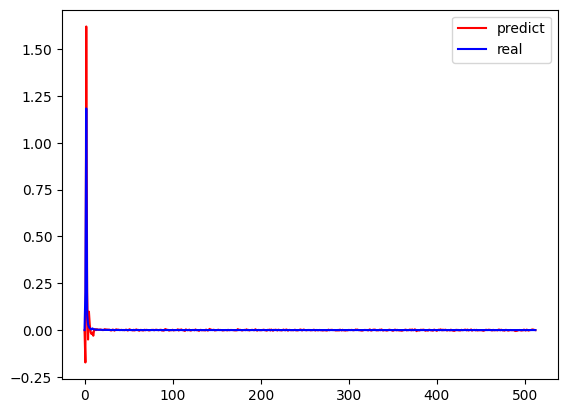

In [16]:
plt.plot(y_pred_psd[1], color = "red", label = "predict")
plt.plot(y_test_psd_detach[1], color = "blue", label = "real")
plt.legend()
plt.show()